#What we are looking for:
1. Gross income
    1.1. Gross income comparison by branches
    1.2. Gross income comparison by months
    1.3. Gross income comparison by day of week
2. Payment type comparison
3. Purchasing time comparision

#Import Libraries & Connect to Google Drive

In [1]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

#Read Data
import pandas as pd

#Matrix
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Datetime
import datetime

Mounted at /content/drive


#Read Data

In [2]:
Path = '/content/drive/MyDrive/Data Master/Colab/Project/supermarket_sales.csv'
Data = pd.read_csv(Path, parse_dates=['Date'])
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


##Create Day Name

In [3]:
Data['DayName'] = Data['Date'].dt.day_name()
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday


##Create Month Name

In [4]:
Data['MonthName'] = Data['Date'].dt.month_name()
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February


##Create Customer Segment

In [5]:
Data['Customer Segment'] = Data['Gender'] + ' ' + Data['Customer type']
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName,Customer Segment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Female Member
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Female Normal
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,Male Normal
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,Male Member
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,Male Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January,Male Normal
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,March,Female Normal
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February,Male Member
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February,Male Normal


##Create Purchasing Time

In [6]:
#Define Function

def Convert_Time(Time_Str):
    time = pd.to_datetime(Time_Str).time()
    if time >= pd.to_datetime('10:00').time() and time <= pd.to_datetime('14:00').time():
        return '10:00 - 14:00'
    elif time >= pd.to_datetime('14:01').time() and time <= pd.to_datetime('18:00').time():
        return '14:01 - 18:00'
    elif time >= pd.to_datetime('18:01').time() and time <= pd.to_datetime('21:00').time():
        return '18:01 - 21:00'

#Create Purchasing Time Column

Data['Purchasing Time'] = Data['Time'].apply(Convert_Time)
Data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName,Customer Segment,Purchasing Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Female Member,10:00 - 14:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Female Normal,10:00 - 14:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,Male Normal,10:00 - 14:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,Male Member,18:01 - 21:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,Male Normal,10:00 - 14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January,Male Normal,10:00 - 14:00
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,March,Female Normal,14:01 - 18:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February,Male Member,10:00 - 14:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February,Male Normal,14:01 - 18:00


##Check Data

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [8]:
Data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


##Box plot to find outlier

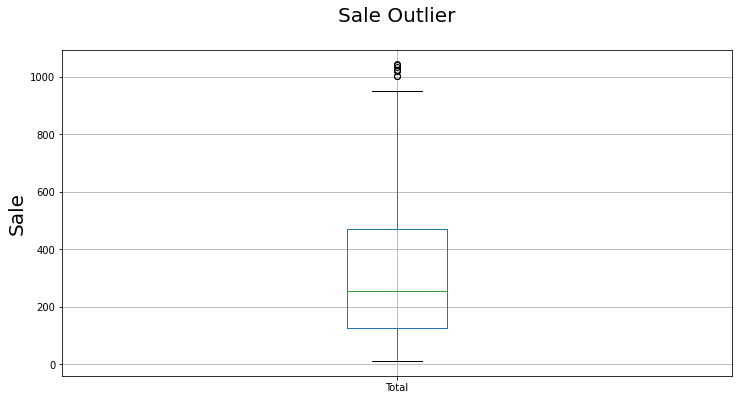

In [9]:
Data.boxplot(column='Total', figsize=(12, 6))

plt.title('Sale Outlier\n', fontsize=20)
plt.ylabel('Sale', fontsize=20)

plt.show()

##Average Spending for Invoice

In [10]:
Data['Total'].mean().round(2)

322.97

In [11]:
Data[Data['Product line'] == 'Health and beauty']['Total'].mean().round(2)

323.64

#Overall Data Analysis

##Gross Income Comparison

###1. Gross income comparison by branches

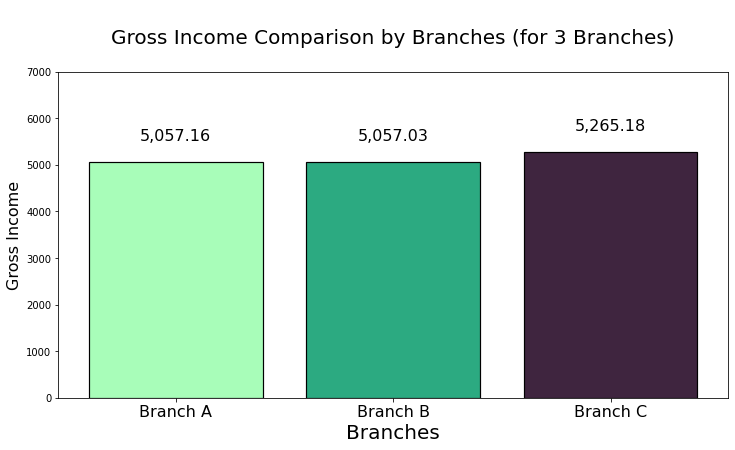

In [12]:
Branch_Names = ['Branch A', 'Branch B', 'Branch C']

Gross_Margin = [Data.groupby(by='Branch').sum().loc['A']['gross income'].round(2),
                        Data.groupby(by='Branch').sum().loc['B']['gross income'].round(2),
                        Data.groupby(by='Branch').sum().loc['C']['gross income'].round(2)]

# Variable
x = np.arange(len(Branch_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Branches (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Branches', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Branch_Names, fontsize=16)
ax.set_ylim(0, 7000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 400, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###2. Gross income comparison by months
Promote valentine theme to draw more traffic in February

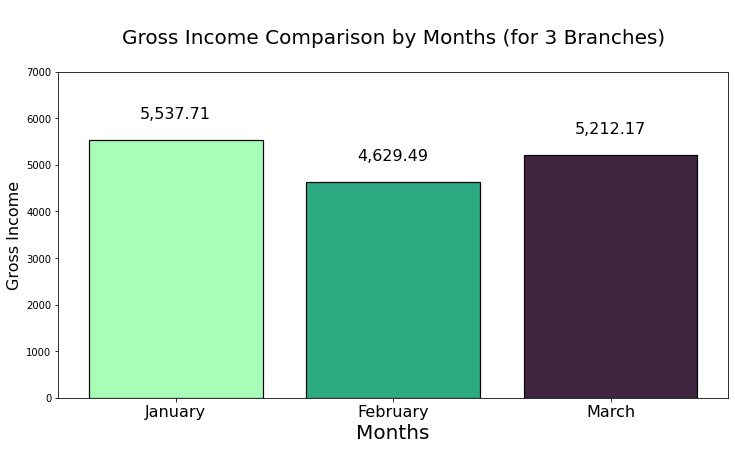

In [13]:
Month_Names = ['January', 'February', 'March']

Gross_Margin = [Data.groupby(by='MonthName').sum().loc['January']['gross income'].round(2),
                        Data.groupby(by='MonthName').sum().loc['February']['gross income'].round(2),
                        Data.groupby(by='MonthName').sum().loc['March']['gross income'].round(2)]

# Variable
x = np.arange(len(Month_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Months (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Month_Names, fontsize=16)
ax.set_ylim(0, 7000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 400, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###3. Gross income comparison by day of week
No actions needed: If we deploy promotion on the low sale days such as; Sunday & Monday, it will draw the existing customers from others days, and overall sale will be the same.

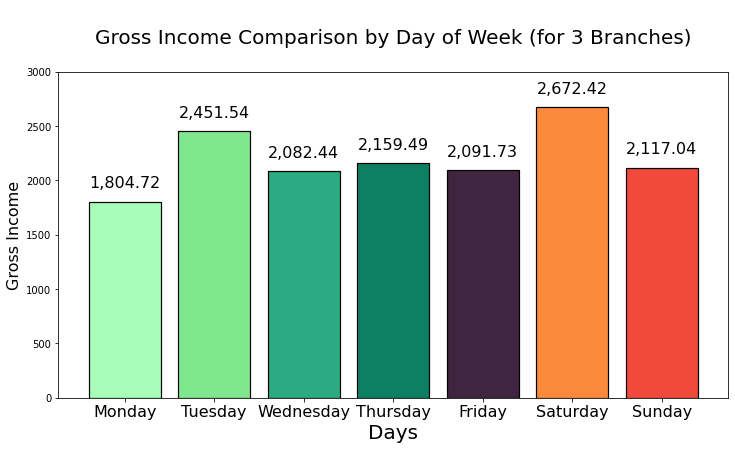

In [14]:
Day_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Gross_Margin = [Data.groupby(by='DayName').sum().loc['Monday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Tuesday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Wednesday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Thursday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Friday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Saturday']['gross income'].round(2),
                        Data.groupby(by='DayName').sum().loc['Sunday']['gross income'].round(2)]

# Variable
x = np.arange(len(Day_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c', '#ef4a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Day of Week (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Day_Names, fontsize=16)
ax.set_ylim(0, 3000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 100, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###4. Gross income comparison for each product line

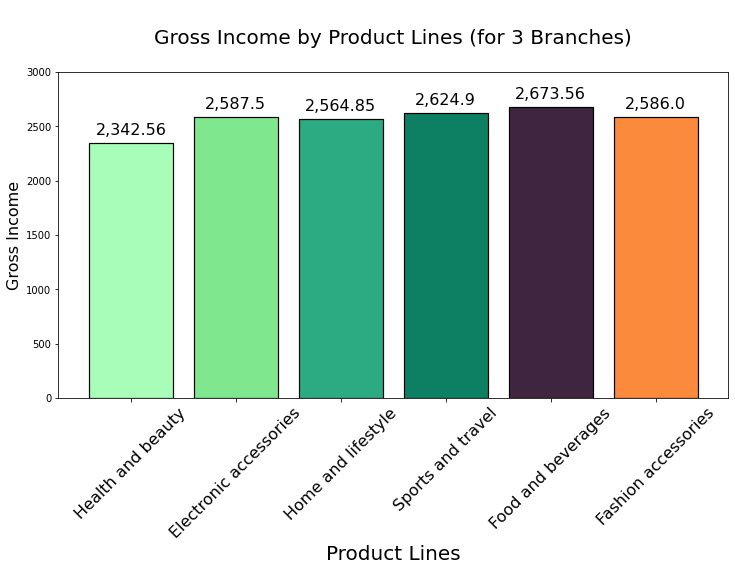

In [15]:
Product_Line = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                    'Sports and travel', 'Food and beverages', 'Fashion accessories']

Gross_Margin = [Data.groupby(by='Product line').sum().loc['Health and beauty']['gross income'].round(2),
                        Data.groupby(by='Product line').sum().loc['Electronic accessories']['gross income'].round(2),
                        Data.groupby(by='Product line').sum().loc['Home and lifestyle']['gross income'].round(2),
                        Data.groupby(by='Product line').sum().loc['Sports and travel']['gross income'].round(2),
                        Data.groupby(by='Product line').sum().loc['Food and beverages']['gross income'].round(2),
                        Data.groupby(by='Product line').sum().loc['Fashion accessories']['gross income'].round(2)]

# Variable
x = np.arange(len(Product_Line))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income by Product Lines (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Product_Line, fontsize=16)
ax.set_ylim(0, 3000)
ax.tick_params(axis='x', labelrotation=45)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###5. Gross income comparison by Customer Segment by Each Product Line
Offer bonus point to "Health and beauty" product line

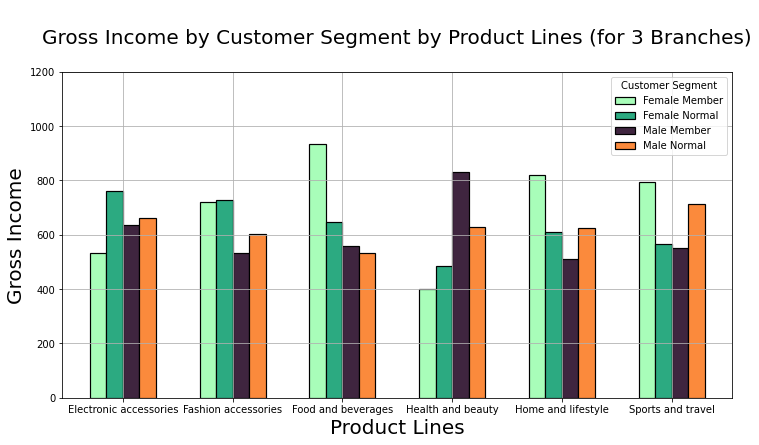

In [16]:
 #Data
 Group = Data.groupby(by=['Product line', 'Customer Segment']).sum()[['gross income']].reset_index()
 Data_Wide = Group.pivot(index='Product line', columns='Customer Segment', values='gross income')

#Color
Colors = ['#a8fdb9', '#2caa81', '#3f253f', '#fb8a3c']

#Setting
ax = Data_Wide.plot(kind='bar', figsize=(12, 6), rot=0, color=Colors, edgecolor='black', linewidth=1.2, width=0.6)

ax.set_ylim(0, 1200)
ax.set_title('\nGross Income by Customer Segment by Product Lines (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=20)


#To plot
plt.grid()
plt.show()

##Customers Exploration

###Customer Type
As "Gross Income Percentage" is 4.7%, offer 3% discount when they are 1st time member to encourage customers to be member.

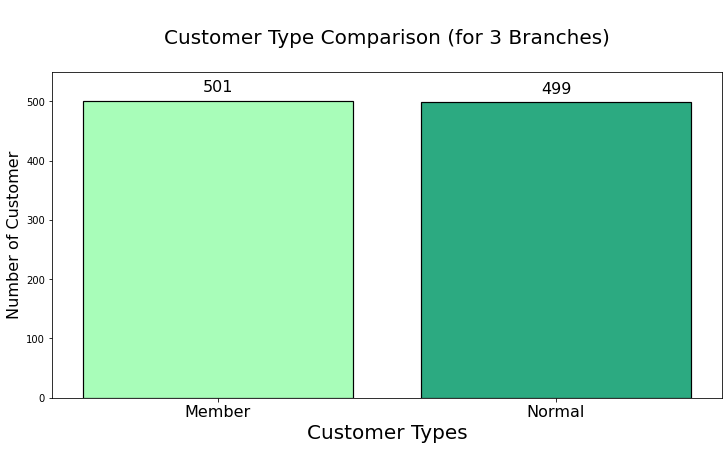

In [17]:
Customer_type = ['Member', 'Normal']

Number_of_Customer = [Data.groupby(by='Customer type').count().loc['Member']['Invoice ID'].round(2),
                                    Data.groupby(by='Customer type').count().loc['Normal']['Invoice ID'].round(2),]

# Variable
x = np.arange(len(Customer_type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Customer, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nCustomer Type Comparison (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Customer Types', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Customer_type, fontsize=16)
ax.set_ylim(0, 550)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Gender

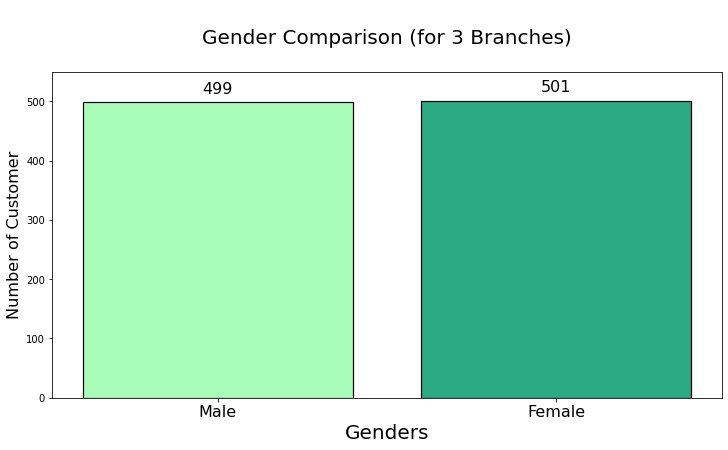

In [18]:
Gender = ['Male', 'Female']

Number_of_Gender = [Data.groupby(by='Gender').count().loc['Male']['Invoice ID'].round(2),
                                Data.groupby(by='Gender').count().loc['Female']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Gender))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Gender, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGender Comparison (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Genders', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Gender, fontsize=16)
ax.set_ylim(0, 550)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

##Payment Type Comparison
No actions needed: We prefer "Cash" and "Ewallet" to "Credit Card". Because we don't need to pay 2.5% credit card fee.

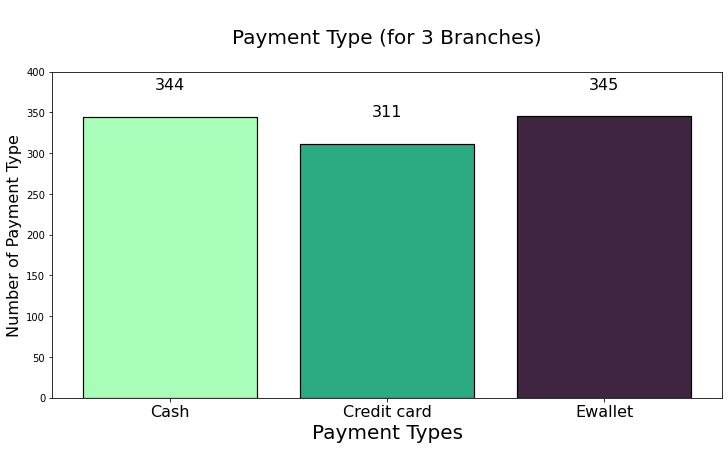

In [19]:
Payment_Type = ['Cash', 'Credit card', 'Ewallet']

Payment = [Data.groupby(by='Payment').count().loc['Cash']['Invoice ID'],
                Data.groupby(by='Payment').count().loc['Credit card']['Invoice ID'],
                Data.groupby(by='Payment').count().loc['Ewallet']['Invoice ID']]

# Variable
x = np.arange(len(Payment_Type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Payment, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPayment Type (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Payment Types', fontsize=20)
ax.set_ylabel('Number of Payment Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Payment_Type, fontsize=16)
ax.set_ylim(0, 400)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

##Purchasing Time Comparison
Employ lower number of staff  from 18:01 - 21:00 to reduce the cost.

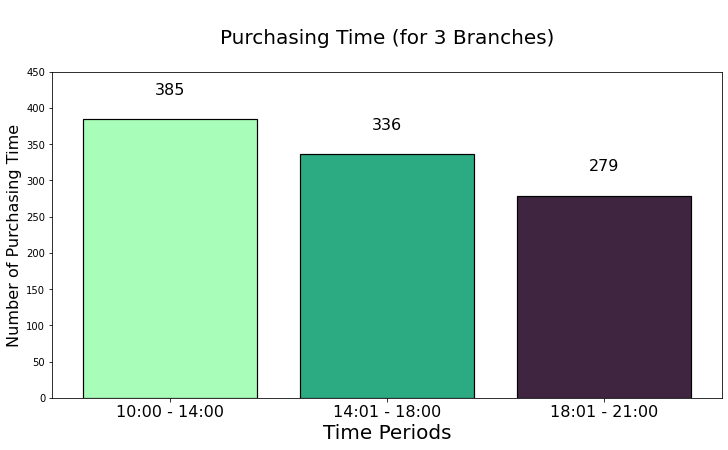

In [20]:
Purchasing_Time = ['10:00 - 14:00', '14:01 - 18:00', '18:01 - 21:00']

Time = [Data.groupby(by='Purchasing Time').count().loc['10:00 - 14:00']['Invoice ID'],
            Data.groupby(by='Purchasing Time').count().loc['14:01 - 18:00']['Invoice ID'],
            Data.groupby(by='Purchasing Time').count().loc['18:01 - 21:00']['Invoice ID']]

# Variable
x = np.arange(len(Purchasing_Time))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Time, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPurchasing Time (for 3 Branches)\n', fontsize=20)
ax.set_xlabel('Time Periods', fontsize=20)
ax.set_ylabel('Number of Purchasing Time', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Purchasing_Time, fontsize=16)
ax.set_ylim(0, 450)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 30, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

#Seperate Data to 3 branches for Data Analysis

##Data Seperation

In [21]:
DF_A = Data[Data['Branch'] == 'A']
DF_A

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName,Customer Segment,Purchasing Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,Female Member,10:00 - 14:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,Male Normal,10:00 - 14:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,Male Member,18:01 - 21:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,Male Normal,10:00 - 14:00
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,...,14:36,Ewallet,413.04,4.761905,20.6520,5.8,Monday,February,Female Member,14:01 - 18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,...,19:06,Credit card,282.80,4.761905,14.1400,4.5,Friday,March,Female Normal,18:01 - 21:00
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,...,20:46,Ewallet,116.06,4.761905,5.8030,8.8,Sunday,March,Male Normal,18:01 - 21:00
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February,Male Member,10:00 - 14:00
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February,Male Normal,14:01 - 18:00


In [22]:
DF_B = Data[Data['Branch'] == 'B']
DF_B

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName,Customer Segment,Purchasing Time
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,...,13:27,Credit card,164.52,4.761905,8.226,5.9,Wednesday,February,Female Member,10:00 - 14:00
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,...,18:07,Ewallet,57.92,4.761905,2.896,4.5,Wednesday,February,Female Member,18:01 - 21:00
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,...,17:03,Cash,102.04,4.761905,5.102,6.8,Saturday,March,Male Member,14:01 - 18:00
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,...,16:19,Cash,562.32,4.761905,28.116,4.5,Tuesday,January,Female Member,14:01 - 18:00
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,...,15:30,Ewallet,80.60,4.761905,4.030,4.4,Monday,March,Female Normal,14:01 - 18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,...,19:08,Credit card,496.00,4.761905,24.800,6.2,Thursday,January,Male Member,18:01 - 21:00
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,...,15:46,Credit card,602.96,4.761905,30.148,8.4,Monday,January,Male Member,14:01 - 18:00
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,...,18:10,Ewallet,766.00,4.761905,38.300,6.0,Thursday,January,Female Normal,18:01 - 21:00
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,...,18:35,Ewallet,174.90,4.761905,8.745,6.6,Friday,February,Male Normal,18:01 - 21:00


In [23]:
DF_C = Data[Data['Branch'] == 'C']
DF_C

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,DayName,MonthName,Customer Segment,Purchasing Time
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,Female Normal,10:00 - 14:00
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,...,18:30,Ewallet,597.73,4.761905,29.8865,4.1,Monday,March,Male Normal,18:01 - 21:00
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,...,11:38,Ewallet,735.60,4.761905,36.7800,8.0,Sunday,February,Female Normal,10:00 - 14:00
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,...,11:24,Ewallet,430.20,4.761905,21.5100,4.8,Monday,February,Male Member,10:00 - 14:00
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,...,10:42,Ewallet,397.68,4.761905,19.8840,7.5,Wednesday,February,Female Member,10:00 - 14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,...,10:33,Cash,699.72,4.761905,34.9860,6.1,Wednesday,January,Male Normal,10:00 - 14:00
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,...,11:40,Cash,674.59,4.761905,33.7295,6.0,Wednesday,January,Male Normal,10:00 - 14:00
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,...,19:12,Ewallet,823.40,4.761905,41.1700,4.3,Friday,March,Male Member,18:01 - 21:00
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,11:40,Ewallet,60.95,4.761905,3.0475,5.9,Monday,February,Female Member,10:00 - 14:00


###Check Data

In [24]:
DF_A.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059
std,26.132127,2.859876,11.030477,231.640025,220.609547,0.000000,11.030477,1.731345
min,10.080000,1.000000,0.604500,12.694500,12.090000,4.761905,0.604500,4.000000
25%,32.250000,3.000000,6.547125,137.489625,130.942500,4.761905,6.547125,5.600000
50%,53.235000,5.000000,11.468000,240.828000,229.360000,4.761905,11.468000,7.100000
75%,75.095000,8.000000,21.873375,459.340875,437.467500,4.761905,21.873375,8.500000
max,99.830000,10.000000,49.490000,1039.290000,989.800000,4.761905,49.490000,10.000000


In [25]:
DF_B.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
std,26.224559,2.896446,11.545122,242.447565,230.902443,0.000000,11.545122,1.713719
min,10.590000,1.000000,0.887500,18.637500,17.750000,4.761905,0.887500,4.000000
25%,33.300000,3.000000,5.711250,119.936250,114.225000,4.761905,5.711250,5.300000
50%,54.850000,5.000000,12.042000,252.882000,240.840000,4.761905,12.042000,6.700000
75%,77.002500,8.000000,22.170750,465.585750,443.415000,4.761905,22.170750,8.200000
max,99.960000,10.000000,48.690000,1022.490000,973.800000,4.761905,48.690000,10.000000


In [26]:
DF_C.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
std,27.179799,3.021724,12.531470,263.160870,250.629400,0.000000,12.531470,1.704526
min,10.160000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.767500,3.000000,5.784500,121.474500,115.690000,4.761905,5.784500,5.600000
50%,56.810000,6.000000,12.924750,271.419750,258.495000,4.761905,12.924750,7.100000
75%,81.552500,8.000000,23.607375,495.754875,472.147500,4.761905,23.607375,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


##Branch A: Yangon

### Gross Margin Comparison

####1. Gross income comparison by months
Promote in Valentine theme and decoration to increase February sale.

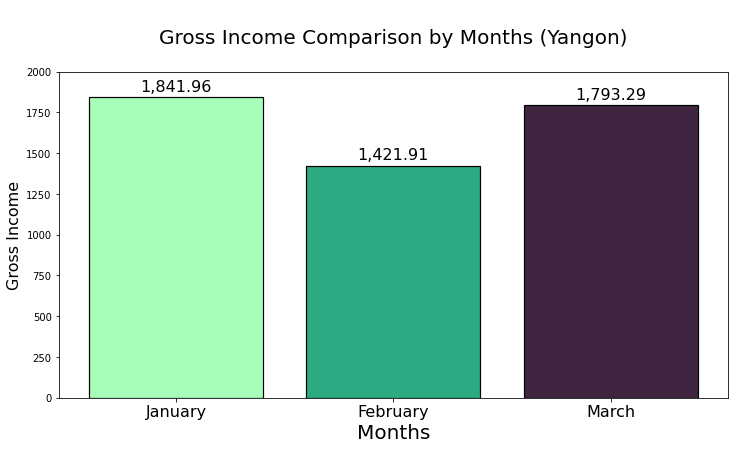

In [27]:
Month_Names = ['January', 'February', 'March']

Gross_Margin = [DF_A.groupby(by='MonthName').sum().loc['January']['gross income'].round(2),
                        DF_A.groupby(by='MonthName').sum().loc['February']['gross income'].round(2),
                        DF_A.groupby(by='MonthName').sum().loc['March']['gross income'].round(2)]

# Variable
x = np.arange(len(Month_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Months (Yangon)\n', fontsize=20)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Month_Names, fontsize=16)
ax.set_ylim(0, 2000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####2. Gross income comparison by day of week
No actions needed: If we deploy promotion on the low sale days such as; Sunday & Monday, it will draw the existing customers from others days, and overall sale will be the same.


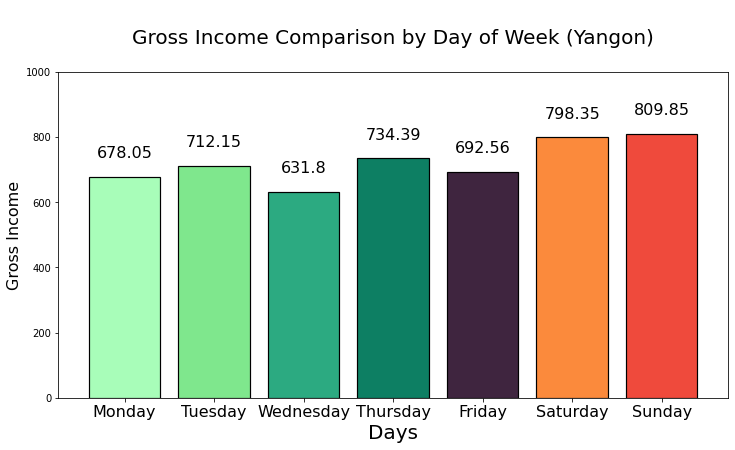

In [28]:
Day_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Gross_Margin = [DF_A.groupby(by='DayName').sum().loc['Monday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Tuesday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Wednesday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Thursday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Friday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Saturday']['gross income'].round(2),
                        DF_A.groupby(by='DayName').sum().loc['Sunday']['gross income'].round(2)]

# Variable
x = np.arange(len(Day_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c', '#ef4a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Day of Week (Yangon)\n', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Day_Names, fontsize=16)
ax.set_ylim(0, 1000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####3. Gross income comparison for each product line
Same as number 4

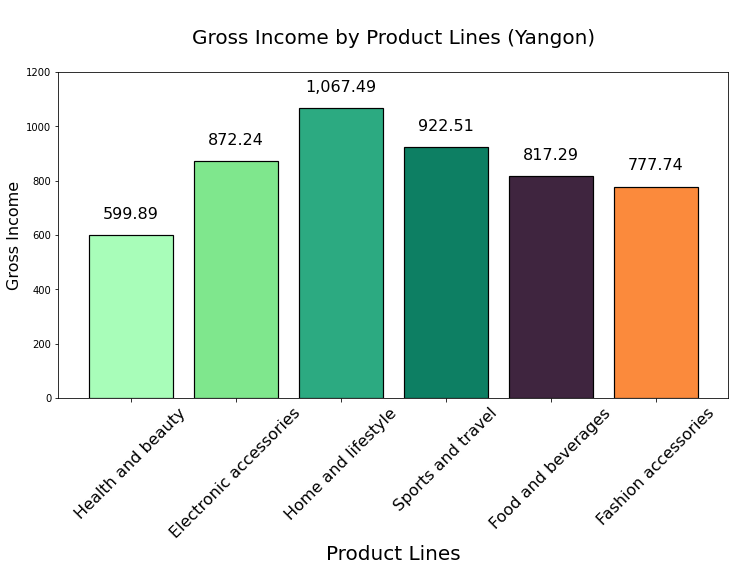

In [29]:
Product_Line = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                    'Sports and travel', 'Food and beverages', 'Fashion accessories']

Gross_Margin = [DF_A.groupby(by='Product line').sum().loc['Health and beauty']['gross income'].round(2),
                        DF_A.groupby(by='Product line').sum().loc['Electronic accessories']['gross income'].round(2),
                        DF_A.groupby(by='Product line').sum().loc['Home and lifestyle']['gross income'].round(2),
                        DF_A.groupby(by='Product line').sum().loc['Sports and travel']['gross income'].round(2),
                        DF_A.groupby(by='Product line').sum().loc['Food and beverages']['gross income'].round(2),
                        DF_A.groupby(by='Product line').sum().loc['Fashion accessories']['gross income'].round(2)]

# Variable
x = np.arange(len(Product_Line))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income by Product Lines (Yangon)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Product_Line, fontsize=16)
ax.set_ylim(0, 1200)
ax.tick_params(axis='x', labelrotation=45)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####4. Gross income comparison by Customer Segment by Each Product Line
For loyalty program and sale boosting:
- As gross income on health and beauty products is low, I would recommend to encourage them be member by offer them a point collection and redemption. Using less point to redeem this product line than others.

- As average spending on per invoice is 312USD, I would recommend to up sale by offering a point bonus. For example, the customers normally get 1 point for every 25USD they spent, when their spending per invoice reach 350USD, the point could be 16 points (10% more) instead of 14 points. So, some of them may prefer to spend up until 350USD and the company has more sale.

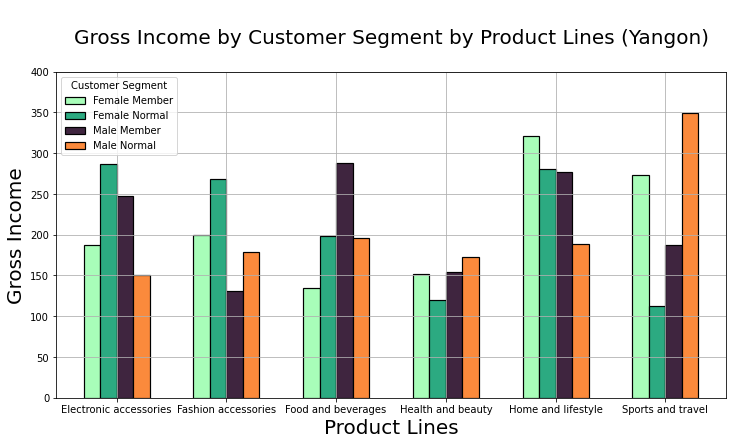

In [30]:
 #Data
 Group = DF_A.groupby(by=['Product line', 'Customer Segment']).sum()[['gross income']].reset_index()
 DF_A_Wide = Group.pivot(index='Product line', columns='Customer Segment', values='gross income')

#Color
Colors = ['#a8fdb9', '#2caa81', '#3f253f', '#fb8a3c']

#Setting
ax = DF_A_Wide.plot(kind='bar', figsize=(12, 6), rot=0, color=Colors, edgecolor='black', linewidth=1.2, width=0.6)

ax.set_ylim(0, 400)
ax.set_title('\nGross Income by Customer Segment by Product Lines (Yangon)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=20)


#To plot
plt.grid()
plt.show()

###Customers Exploration

####Customer Type
As "Gross Income Percentage" is 4.7%, offer 3% discount when they are 1st time member to encourage customers to be member.

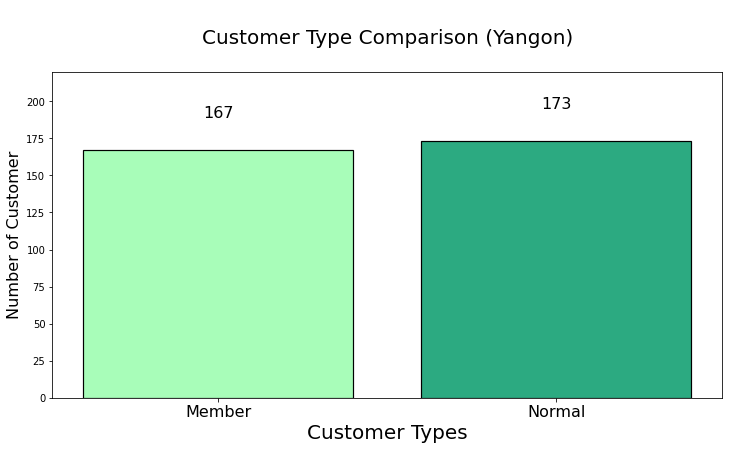

In [31]:
Customer_type = ['Member', 'Normal']

Number_of_Customer = [DF_A.groupby(by='Customer type').count().loc['Member']['Invoice ID'].round(2),
                                    DF_A.groupby(by='Customer type').count().loc['Normal']['Invoice ID'].round(2),]

# Variable
x = np.arange(len(Customer_type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Customer, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nCustomer Type Comparison (Yangon)\n', fontsize=20)
ax.set_xlabel('Customer Types', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Customer_type, fontsize=16)
ax.set_ylim(0, 220)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####Gender

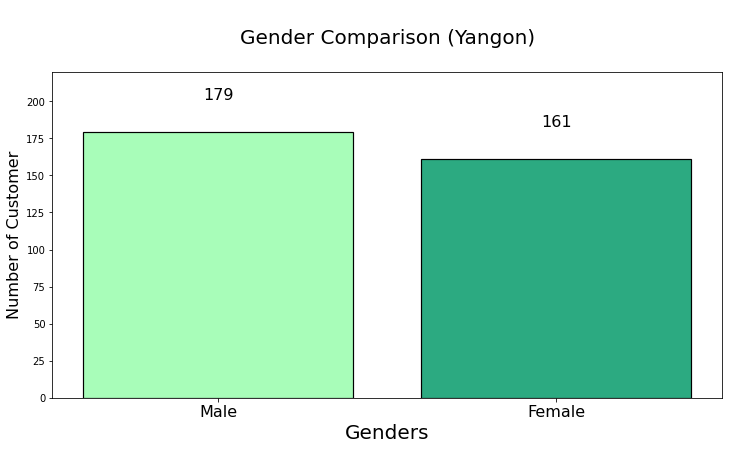

In [32]:
Gender = ['Male', 'Female']

Number_of_Gender = [DF_A.groupby(by='Gender').count().loc['Male']['Invoice ID'].round(2),
                                DF_A.groupby(by='Gender').count().loc['Female']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Gender))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Gender, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGender Comparison (Yangon)\n', fontsize=20)
ax.set_xlabel('Genders', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Gender, fontsize=16)
ax.set_ylim(0, 220)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Payment Type Comparison
Offer 2% discount for cash payment, to encourage customers to pay cash instead of credit card which contains 2.5% fee and the company gain more profit.

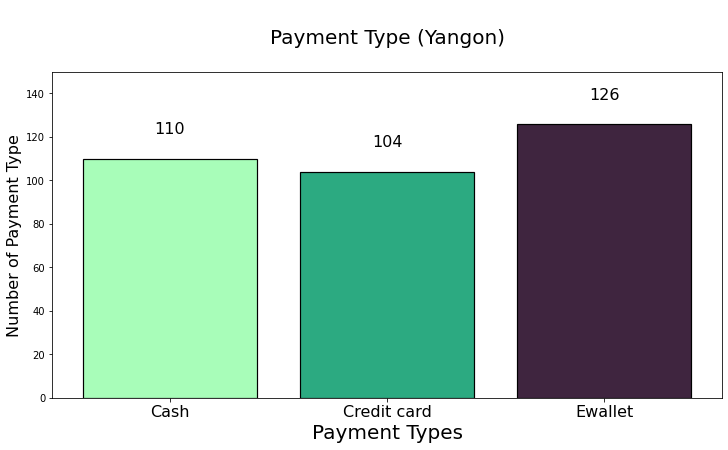

In [33]:
Payment_Type = ['Cash', 'Credit card', 'Ewallet']

Payment = [DF_A.groupby(by='Payment').count().loc['Cash']['Invoice ID'],
                DF_A.groupby(by='Payment').count().loc['Credit card']['Invoice ID'],
                DF_A.groupby(by='Payment').count().loc['Ewallet']['Invoice ID']]

# Variable
x = np.arange(len(Payment_Type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Payment, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPayment Type (Yangon)\n', fontsize=20)
ax.set_xlabel('Payment Types', fontsize=20)
ax.set_ylabel('Number of Payment Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Payment_Type, fontsize=16)
ax.set_ylim(0, 150)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Purchasing Time Comparison
Employ lower number of staff  from 18:01 - 21:00 to reduce the cost.

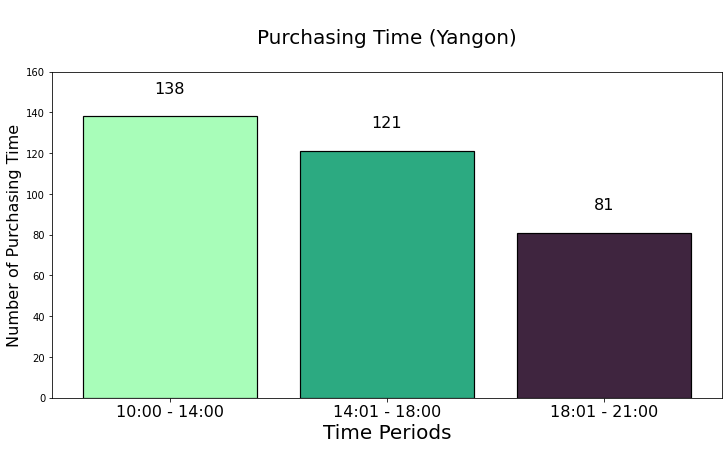

In [34]:
Purchasing_Time = ['10:00 - 14:00', '14:01 - 18:00', '18:01 - 21:00']

Time = [DF_A.groupby(by='Purchasing Time').count().loc['10:00 - 14:00']['Invoice ID'],
            DF_A.groupby(by='Purchasing Time').count().loc['14:01 - 18:00']['Invoice ID'],
            DF_A.groupby(by='Purchasing Time').count().loc['18:01 - 21:00']['Invoice ID']]

# Variable
x = np.arange(len(Purchasing_Time))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Time, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPurchasing Time (Yangon)\n', fontsize=20)
ax.set_xlabel('Time Periods', fontsize=20)
ax.set_ylabel('Number of Purchasing Time', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Purchasing_Time, fontsize=16)
ax.set_ylim(0, 160)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

##Branch B: Mandalay

### Gross Margin Comparison

####1. Gross income comparison by months

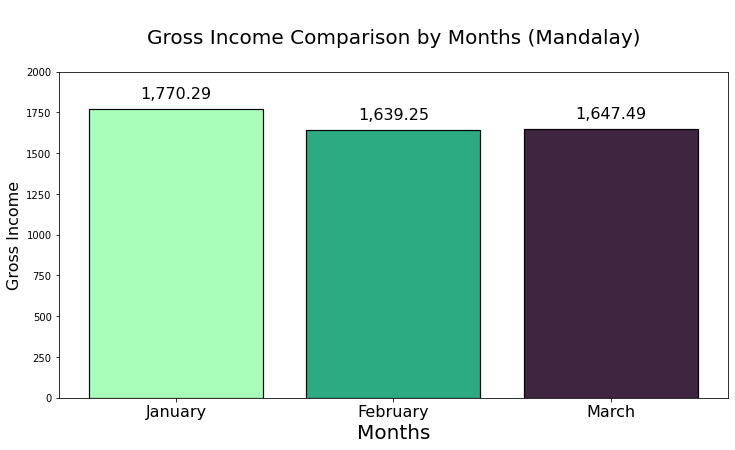

In [35]:
Month_Names = ['January', 'February', 'March']

Gross_Margin = [DF_B.groupby(by='MonthName').sum().loc['January']['gross income'].round(2),
                        DF_B.groupby(by='MonthName').sum().loc['February']['gross income'].round(2),
                        DF_B.groupby(by='MonthName').sum().loc['March']['gross income'].round(2)]

# Variable
x = np.arange(len(Month_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Months (Mandalay)\n', fontsize=20)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Month_Names, fontsize=16)
ax.set_ylim(0, 2000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####2. Gross income comparison by day of week
Employ lower number of staff  on Monday, Wednesday, and Sunday to reduce the cost.

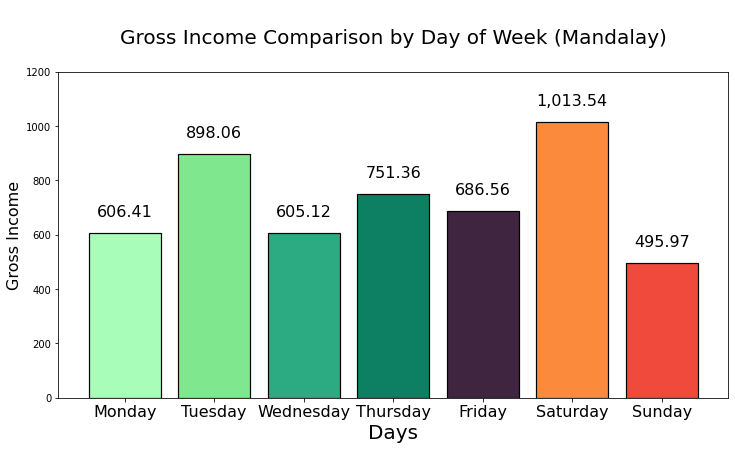

In [36]:
Day_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Gross_Margin = [DF_B.groupby(by='DayName').sum().loc['Monday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Tuesday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Wednesday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Thursday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Friday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Saturday']['gross income'].round(2),
                        DF_B.groupby(by='DayName').sum().loc['Sunday']['gross income'].round(2)]

# Variable
x = np.arange(len(Day_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c', '#ef4a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Day of Week (Mandalay)\n', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Day_Names, fontsize=16)
ax.set_ylim(0, 1200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####3. Gross income comparison for each product line
Same as 4

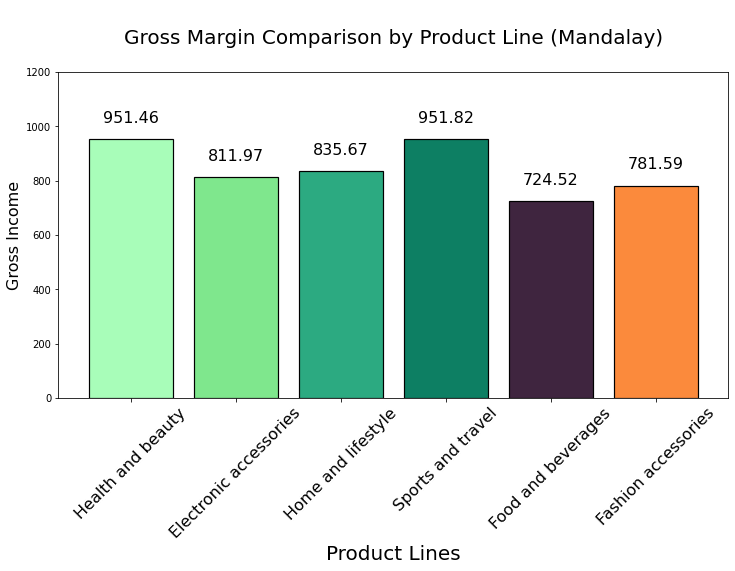

In [37]:
Product_Line = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                    'Sports and travel', 'Food and beverages', 'Fashion accessories']

Gross_Margin = [DF_B.groupby(by='Product line').sum().loc['Health and beauty']['gross income'].round(2),
                        DF_B.groupby(by='Product line').sum().loc['Electronic accessories']['gross income'].round(2),
                        DF_B.groupby(by='Product line').sum().loc['Home and lifestyle']['gross income'].round(2),
                        DF_B.groupby(by='Product line').sum().loc['Sports and travel']['gross income'].round(2),
                        DF_B.groupby(by='Product line').sum().loc['Food and beverages']['gross income'].round(2),
                        DF_B.groupby(by='Product line').sum().loc['Fashion accessories']['gross income'].round(2)]

# Variable
x = np.arange(len(Product_Line))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Margin Comparison by Product Line (Mandalay)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Product_Line, fontsize=16)
ax.set_ylim(0, 1200)
ax.tick_params(axis='x', labelrotation=45)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####4. Gross income comparison by Customer Segment by Each Product Line
For loyalty program and sale boosting:
- As gross income on food and beverages products is low, I would recommend to encourage them be member by offer them a point collection and redemption. Using less point to redeem this product line than others.

- As average spending on per invoice is 319USD, I would recommend to up sale by offering a point bonus. For example, the customers normally get 1 point for every 25USD they spent, when their spending per invoice reach 350USD, the point could be 16 points (10% more) instead of 14 points. So, some of them may prefer to spend up until 350USD and the company has more sale.

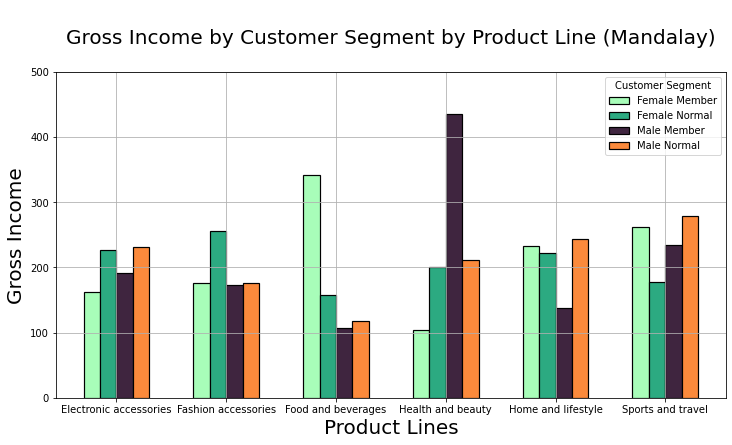

In [38]:
 #Data
 Group = DF_B.groupby(by=['Product line', 'Customer Segment']).sum()[['gross income']].reset_index()
 DF_B_Wide = Group.pivot(index='Product line', columns='Customer Segment', values='gross income')

#Color
Colors = ['#a8fdb9', '#2caa81', '#3f253f', '#fb8a3c']

#Setting
ax = DF_B_Wide.plot(kind='bar', figsize=(12, 6), rot=0, color=Colors, edgecolor='black', linewidth=1.2, width=0.6)

ax.set_ylim(0, 500)
ax.set_title('\nGross Income by Customer Segment by Product Line (Mandalay)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=20)


#To plot
plt.grid()
plt.show()

###Customers Exploration

####Customer Type
As "Gross Income Percentage" is 4.7%, offer 3% discount when they are 1st time member to encourage customers to be member.

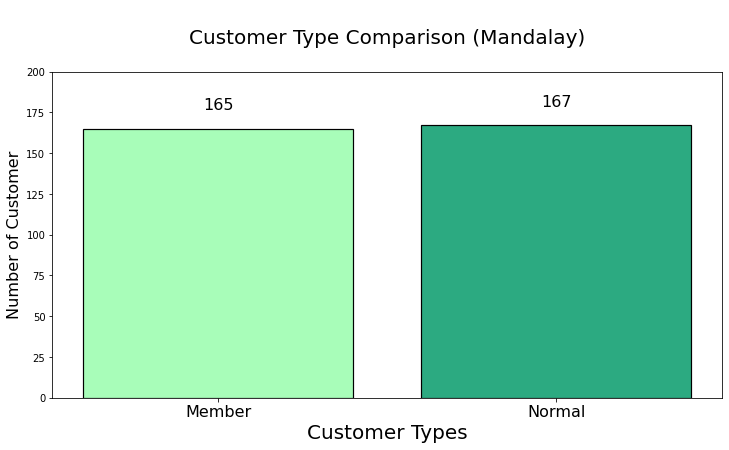

In [39]:
Customer_type = ['Member', 'Normal']

Number_of_Customer = [DF_B.groupby(by='Customer type').count().loc['Member']['Invoice ID'].round(2),
                                    DF_B.groupby(by='Customer type').count().loc['Normal']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Customer_type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Customer, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nCustomer Type Comparison (Mandalay)\n', fontsize=20)
ax.set_xlabel('Customer Types', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Customer_type, fontsize=16)
ax.set_ylim(0, 200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####Gender

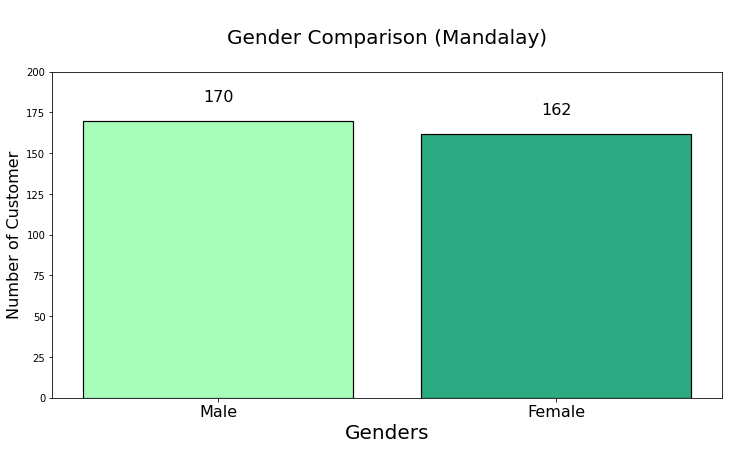

In [40]:
Gender = ['Male', 'Female']

Number_of_Gender = [DF_B.groupby(by='Gender').count().loc['Male']['Invoice ID'].round(2),
                                DF_B.groupby(by='Gender').count().loc['Female']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Gender))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Gender, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGender Comparison (Mandalay)\n', fontsize=20)
ax.set_xlabel('Genders', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Gender, fontsize=16)
ax.set_ylim(0, 200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Payment Type Comparison
Offer 2% discount for cash payment, to encourage customers to pay cash instead of credit card which contains 2.5% fee and the company gain more profit.

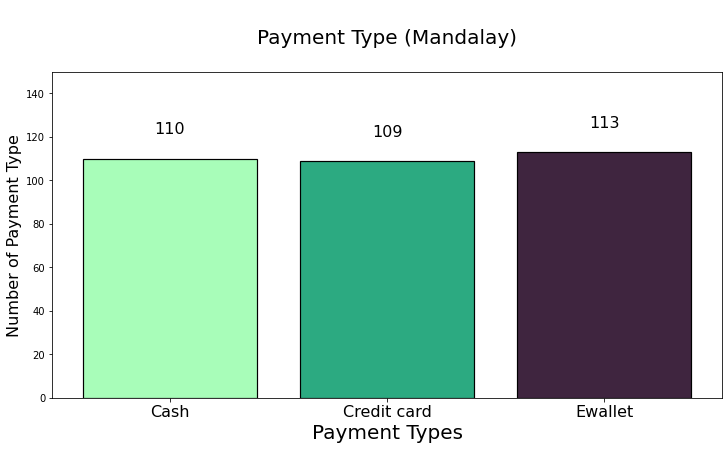

In [41]:
Payment_Type = ['Cash', 'Credit card', 'Ewallet']

Payment = [DF_B.groupby(by='Payment').count().loc['Cash']['Invoice ID'],
                DF_B.groupby(by='Payment').count().loc['Credit card']['Invoice ID'],
                DF_B.groupby(by='Payment').count().loc['Ewallet']['Invoice ID']]

# Variable
x = np.arange(len(Payment_Type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Payment, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPayment Type (Mandalay)\n', fontsize=20)
ax.set_xlabel('Payment Types', fontsize=20)
ax.set_ylabel('Number of Payment Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Payment_Type, fontsize=16)
ax.set_ylim(0, 150)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Purchasing Time Comparison
No actions needed: The company cannot employ some staffs only 4 hrs.

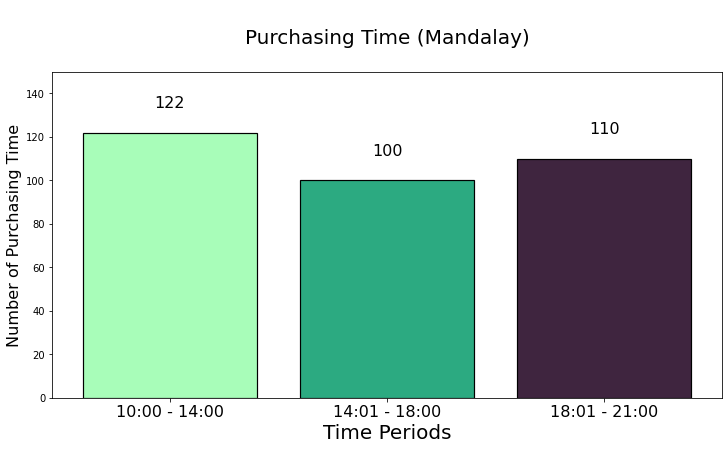

In [42]:
Purchasing_Time = ['10:00 - 14:00', '14:01 - 18:00', '18:01 - 21:00']

Time = [DF_B.groupby(by='Purchasing Time').count().loc['10:00 - 14:00']['Invoice ID'],
            DF_B.groupby(by='Purchasing Time').count().loc['14:01 - 18:00']['Invoice ID'],
            DF_B.groupby(by='Purchasing Time').count().loc['18:01 - 21:00']['Invoice ID']]

# Variable
x = np.arange(len(Purchasing_Time))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Time, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPurchasing Time (Mandalay)\n', fontsize=20)
ax.set_xlabel('Time Periods', fontsize=20)
ax.set_ylabel('Number of Purchasing Time', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Purchasing_Time, fontsize=16)
ax.set_ylim(0, 150)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

##Branch C: Naypyitaw

### Gross Margin Comparison

####1. Gross income comparison by months
Promote in Valentine theme and decoration to increase February sale.

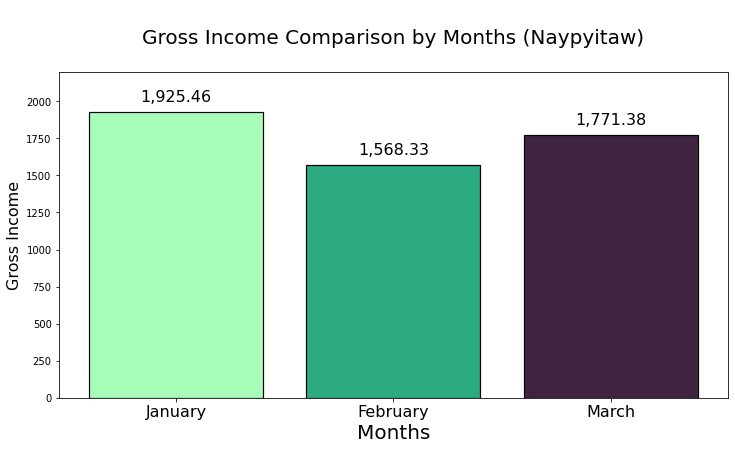

In [43]:
Month_Names = ['January', 'February', 'March']

Gross_Margin = [DF_C.groupby(by='MonthName').sum().loc['January']['gross income'].round(2),
                        DF_C.groupby(by='MonthName').sum().loc['February']['gross income'].round(2),
                        DF_C.groupby(by='MonthName').sum().loc['March']['gross income'].round(2)]

# Variable
x = np.arange(len(Month_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Months (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Months', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Month_Names, fontsize=16)
ax.set_ylim(0, 2200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 50, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####2. Gross income comparison by day of week
Employ lower number of staff  on Monday to reduce the cost.

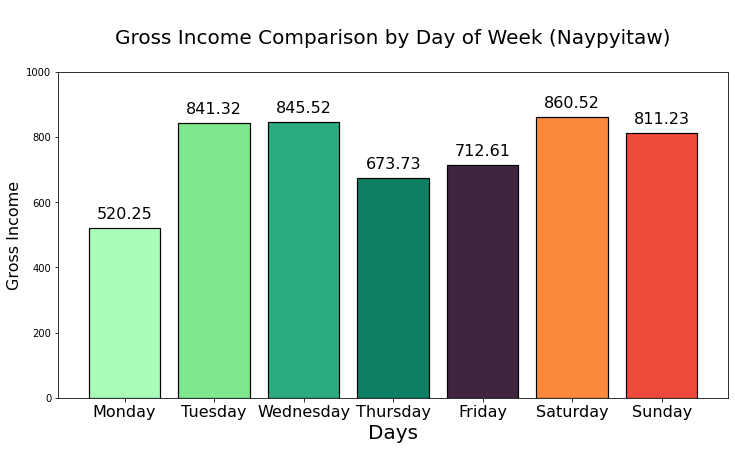

In [44]:
Day_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Gross_Margin = [DF_C.groupby(by='DayName').sum().loc['Monday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Tuesday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Wednesday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Thursday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Friday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Saturday']['gross income'].round(2),
                        DF_C.groupby(by='DayName').sum().loc['Sunday']['gross income'].round(2)]

# Variable
x = np.arange(len(Day_Names))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c', '#ef4a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGross Income Comparison by Day of Week (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Day_Names, fontsize=16)
ax.set_ylim(0, 1000)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####3. Gross income comparison for each product line

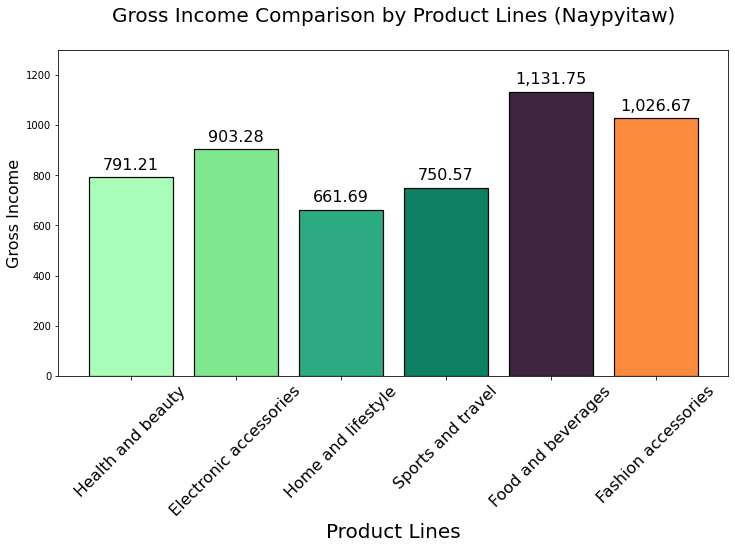

In [45]:
Product_Line = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle',
                    'Sports and travel', 'Food and beverages', 'Fashion accessories']

Gross_Margin = [DF_C.groupby(by='Product line').sum().loc['Health and beauty']['gross income'].round(2),
                        DF_C.groupby(by='Product line').sum().loc['Electronic accessories']['gross income'].round(2),
                        DF_C.groupby(by='Product line').sum().loc['Home and lifestyle']['gross income'].round(2),
                        DF_C.groupby(by='Product line').sum().loc['Sports and travel']['gross income'].round(2),
                        DF_C.groupby(by='Product line').sum().loc['Food and beverages']['gross income'].round(2),
                        DF_C.groupby(by='Product line').sum().loc['Fashion accessories']['gross income'].round(2)]

# Variable
x = np.arange(len(Product_Line))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#7fe78d', '#2caa81', '#0d7f63', '#3f253f', '#fb8a3c']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Gross_Margin, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('Gross Income Comparison by Product Lines (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Product_Line, fontsize=16)
ax.set_ylim(0, 1300)
ax.tick_params(axis='x', labelrotation=45)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 20, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####4. Gross income comparison by Customer Segment by Each Product Line
For loyalty program and sale boosting:
- As gross income on "Home and lifestyle" and "Sports and travel" products is low, I would recommend to encourage them be member by offer them a point collection and redemption. Using less point to redeem this product line than others.

- As average spending on per invoice is 337USD, I would recommend to up sale by offering a point bonus. For example, the customers normally get 1 point for every 25USD they spent, when their spending per invoice reach 375USD, the point could be 17 points (10% more) instead of 15 points. So, some of them may prefer to spend up until 375USD and the company has more sale.

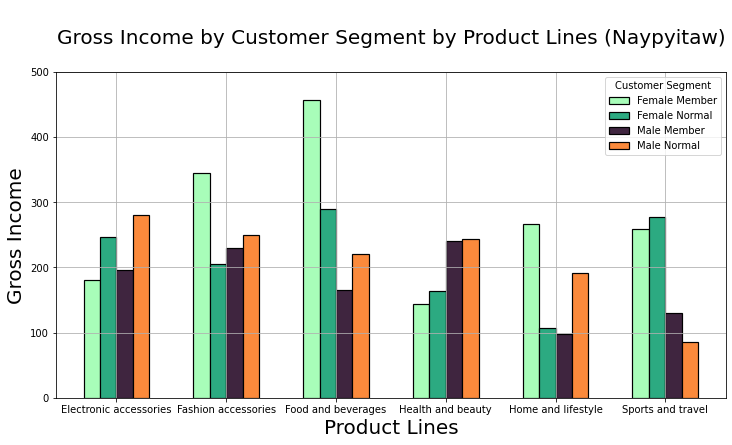

In [46]:
 #Data
 Group = DF_C.groupby(by=['Product line', 'Customer Segment']).sum()[['gross income']].reset_index()
 DF_C_Wide = Group.pivot(index='Product line', columns='Customer Segment', values='gross income')

#Color
Colors = ['#a8fdb9', '#2caa81', '#3f253f', '#fb8a3c']

#Setting
ax = DF_C_Wide.plot(kind='bar', figsize=(12, 6), rot=0, color=Colors, edgecolor='black', linewidth=1.2, width=0.6)

ax.set_ylim(0, 500)
ax.set_title('\nGross Income by Customer Segment by Product Lines (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Product Lines', fontsize=20)
ax.set_ylabel('Gross Income', fontsize=20)


#To plot
plt.grid()
plt.show()

###Customers Exploration

####Customer Type
As "Gross Income Percentage" is 4.7%, offer 3% discount when they are 1st time member to encourage customers to be member.

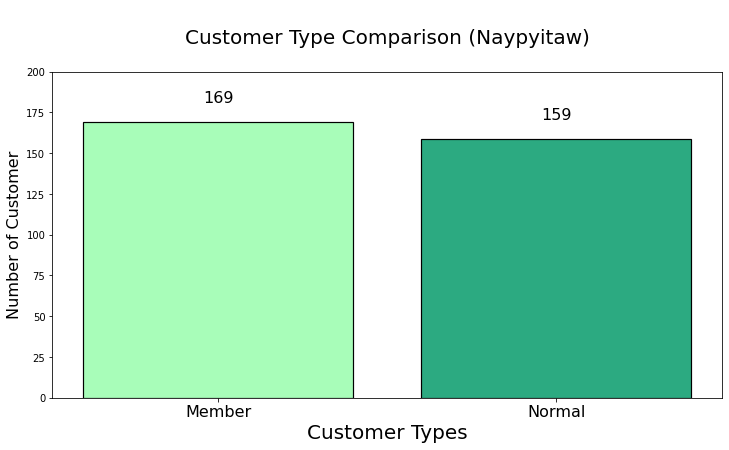

In [47]:
Customer_type = ['Member', 'Normal']

Number_of_Customer = [DF_C.groupby(by='Customer type').count().loc['Member']['Invoice ID'].round(2),
                                    DF_C.groupby(by='Customer type').count().loc['Normal']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Customer_type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Customer, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nCustomer Type Comparison (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Customer Types', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Customer_type, fontsize=16)
ax.set_ylim(0, 200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

####Gender

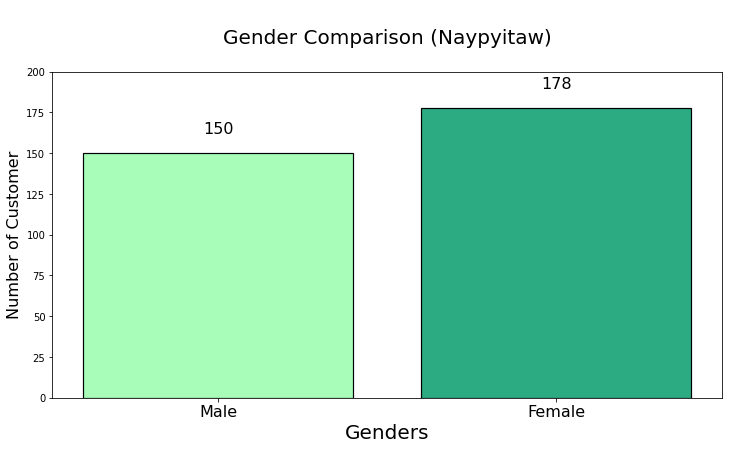

In [48]:
Gender = ['Male', 'Female']

Number_of_Gender = [DF_C.groupby(by='Gender').count().loc['Male']['Invoice ID'].round(2),
                                DF_C.groupby(by='Gender').count().loc['Female']['Invoice ID'].round(2)]

# Variable
x = np.arange(len(Gender))

#Color pallete from https://www.color-hex.com/color-palette/1022790
Colors = ['#a8fdb9', '#2caa81']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Number_of_Gender, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nGender Comparison (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Genders', fontsize=20)
ax.set_ylabel('Number of Customer', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Gender, fontsize=16)
ax.set_ylim(0, 200)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Payment Type Comparison
No actions needed: We prefer "Cash" and "Ewallet" to "Credit Card". Because we don't need to pay 2.5% credit card fee.

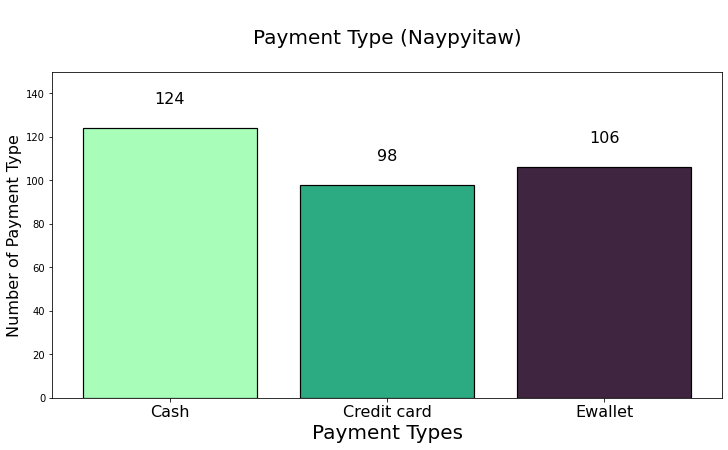

In [49]:
Payment_Type = ['Cash', 'Credit card', 'Ewallet']

Payment = [DF_C.groupby(by='Payment').count().loc['Cash']['Invoice ID'],
                DF_C.groupby(by='Payment').count().loc['Credit card']['Invoice ID'],
                DF_C.groupby(by='Payment').count().loc['Ewallet']['Invoice ID']]

# Variable
x = np.arange(len(Payment_Type))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Payment, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPayment Type (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Payment Types', fontsize=20)
ax.set_ylabel('Number of Payment Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Payment_Type, fontsize=16)
ax.set_ylim(0, 150)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()

###Purchasing Time Comparison
Employ lower number of staff  from 18:01 - 21:00 to reduce the cost.

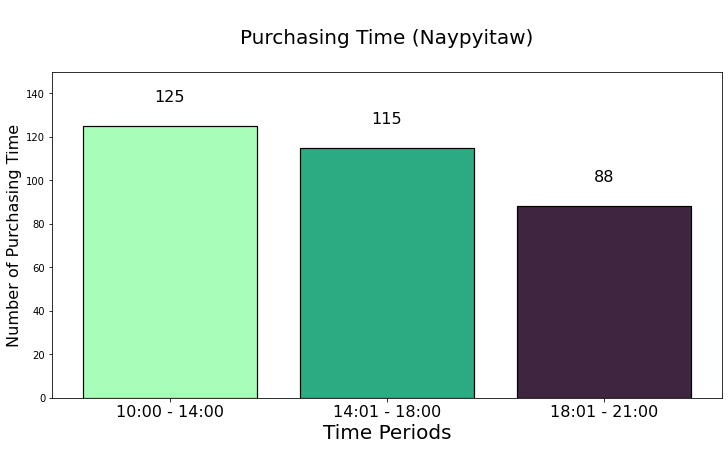

In [50]:
Purchasing_Time = ['10:00 - 14:00', '14:01 - 18:00', '18:01 - 21:00']

Time = [DF_C.groupby(by='Purchasing Time').count().loc['10:00 - 14:00']['Invoice ID'],
            DF_C.groupby(by='Purchasing Time').count().loc['14:01 - 18:00']['Invoice ID'],
            DF_C.groupby(by='Purchasing Time').count().loc['18:01 - 21:00']['Invoice ID']]

# Variable
x = np.arange(len(Purchasing_Time))

#Color pallete from https://www.color-hex.com/color-palette/1022790
#And https://www.color-hex.com/color-palette/1022757
Colors = ['#a8fdb9', '#2caa81', '#3f253f']

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, Time, color=Colors, edgecolor='black', linewidth=1.2)

# Setting
ax.set_title('\nPurchasing Time (Naypyitaw)\n', fontsize=20)
ax.set_xlabel('Time Periods', fontsize=20)
ax.set_ylabel('Number of Purchasing Time', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(Purchasing_Time, fontsize=16)
ax.set_ylim(0, 150)

# Add text annotations above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{height:,}', ha='center', va='bottom', fontsize=16)

# To show
plt.show()